## LAB 5 - TASK 1 submission. ML 2024-25.

FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**:

Eryka Liced Rimacuna Castillo 816778

Luis Catalan Salas            774274

# TSNE to visualize deep feature space
In this task we are applying TSNE to visualize how certain deep descriptor (extracted from a pre-trained CNN for image classification) organizes our data.

## 0. Get your deep features

First, you need to extract the features you want to analyze for your image set. The following code can be used to help you do it. You have a more detailed description of it in https://keras.io/api/applications/
Most features won't be a *flat* vector when you get them, because they have the shape of that layer output, remember you need to flatten them to have a 1-d vector as feature for each image.

In [ ]:
# EXTRACT FEATURES from ANY pre-trained CNN (last layer before the classification)
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import numpy as np

# YOU CAN LOAD YOUR PRE-TRAINED MODEL FROM LAB3 to see how your fine-tuned features look like
img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)
model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
#model = VGG16(include_top=False, weights='imagenet')

from google.colab import drive
drive.mount('/content/drive')

folder = '/content/drive/MyDrive/Informatica/Master/Machine_Learning/Practicas_ML/Practica4_816778_774272/'
images_path_folder = folder + 'images_5/'

img_path = images_path_folder + 'Abyssinian_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print(features.shape)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Mounted at /content/drive
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(1, 7, 7, 1280)


In [ ]:
# You could EXTRACT ANY FEATURE FROM the CNN (explore model layer names with model.summary())
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.models import Model
import numpy as np

img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)

base_model = MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet')
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block_4_add').output)
model.summary()

folder = '/content/drive/MyDrive/Informatica/Master/Machine_Learning/Practicas_ML/Practica4_816778_774272/'
images_path_folder = folder + 'images_5/'

img_path = images_path_folder + 'Abyssinian_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_features = model.predict(x)

# print(block4_features.shape)

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 43,328 (169.25 KB)

 Trainable params: 40,640 (158.75 KB)

 Non-trainable params: 2,688 (10.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


## 1. Run TSNE, visualize and analize the results

You could try any available implementation of TSNE.
We recommend the one from sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
or the one from TSNE author page (https://lvdmaaten.github.io/software/)

If you want to make nicer image mosaics, you can see the examples provided here (they are in Matlab, you'll have to write the equivalent in python)
https://cs.stanford.edu/people/karpathy/cnnembed/



### QUESTION TO DO in LAB5:
* Run TSNE twice, for two different feature extractors, i.e., extract all your features from two different layers, for your toy-dataset images (it could be two layers from the same model, or two layers one from each model). Play a bit with the parameters and configuration options until you think you have a decent visualization. **Note**: it's always recommended to run PCA (to reduce to around 50 long descriptors) before running TSNE. Comment on the code which params are you using. Save those images :-) You can just get plots of coloured points (according to their original class labels). If you would like to try to get nicer image-mosaics you can checkout numerous implementations online, but **it is not required for the lab**, e.g.:

    https://nextjournal.com/ml4a/image-t-sne

    https://github.com/YontiLevin/Embeddings2Image


* Discuss what you can see or sense from those results. How good are those features to represent your data? does it make sense compared to how good/bad the model was performing the image classification?


ANSWERS:

We performed t-SNE visualizations for features extracted from three layers: Block 2, Block 8 and Block 16 of base Model. Prior to applying t-SNE, we used PCA to reduce the feature dimensionality to 50. The scatter plots, colored by class labels, revealed that features from Block 2 showed significant overlap, indicating limited class separation and feature learning. Features from Block 8 demonstrated improved clustering, reflecting mid-level feature learning. Finally, features from Block 16 showed well-separated clusters, indicating that deeper layers capture more refined and discriminative features. These results align with the understanding that deeper layers are better at learning class-specific features, which is crucial for effective classification.

### Load my features

In [ ]:
# EXTRACT FEATURES from ANY pre-trained CNN (last layer before the classification)
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import json
import tensorflow as tf
import numpy as np

# YOU CAN LOAD YOUR PRE-TRAINED MODEL FROM LAB3 to see how your fine-tuned features look like

from google.colab import drive
drive.mount('/content/drive')

folder = '/content/drive/MyDrive/Informatica/Master/Machine_Learning/Practicas_ML/Practica4_816778_774272/'
model_path = folder + 'Models/last_finetuned_model_V1/'
images_path_folder = folder + 'images_5/'

with open(model_path + 'config.json', "r") as config_file:
    config = json.load(config_file)

img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)

#######################################################################
# OUR MODEL
#######################################################################
model_1 = tf.keras.models.model_from_json(json.dumps(config))
model_1.load_weights(model_path + "model.weights.h5")
# model_1.summary()

#######################################################################
# MODEL EXAMPLE 2
#######################################################################
base_model = MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet')
base_model.summary()
model_2 = Model(inputs=base_model.input, outputs=base_model.get_layer('block_8_expand_BN').output)

#######################################################################
# MODEL EXAMPLE 3
#######################################################################
model_3 = Model(inputs=base_model.input, outputs=base_model.get_layer('block_16_expand_relu').output)


img_path = images_path_folder + 'Abyssinian_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model_2.predict(x)
print(features.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
(1, 14, 14, 384)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.decomposition import PCA
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def extract_features(model, image_dir, extract_features_bool, output_features_path="features_.npy"):
  features_list = []

  if extract_features_bool:
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)

        # Load and preprocess image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Extract features using the model
        features = model.predict(x)

        # Flatten features if needed
        features_flattened = features.flatten()
        features_list.append(features_flattened)

    # Convert to NumPy array
    features = np.array(features_list)

    # Save features for later use
    np.save(output_features_path, features)

    print(f"Features extracted and saved to {output_features_path}")
  else:
    folder_features = '/content/drive/MyDrive/Informatica/Master/Machine_Learning/Practicas_ML/Practica5_816778_774272/'
    features_1 = np.load(folder_features + 'features_3.npy')  # (998, 75264) MODEL 3 (block_2_add)
    features_2 = np.load(folder_features + 'features_2.npy') # (998, 75264) MODEL 2 (block_8_expand_BN)
    features_3 = np.load(folder_features + 'features_4.npy') # (998, 47040) MODEL 3 (block_16_expand_relu)
    return features_1, features_2, features_3

extract_features_bool = False
features_1, features_2, features_3 = extract_features(model_2, images_path_folder, extract_features_bool, output_features_path="features_2.npy")
print(f"Feature_1 array shape: {features_1.shape}")
print(f"Feature_2 array shape: {features_2.shape}")
print(f"Feature_3 array shape: {features_3.shape}")


# PCA
n_components = 50
pca_1 = PCA(n_components=n_components)
pca_2 = PCA(n_components=n_components)
pca_3 = PCA(n_components=n_components)

features_1_centered = features_1 - np.mean(features_1, axis=0)
features_2_centered = features_2 - np.mean(features_2, axis=0)
features_3_centered = features_3 - np.mean(features_3, axis=0)

features_1_pca = pca_1.fit_transform(features_1_centered)
features_2_pca = pca_2.fit_transform(features_2_centered)
features_3_pca = pca_3.fit_transform(features_3_centered)

# Ver el tamaño de los datos después de PCA
print(f"Feature_1 PCA shape: {features_1_pca.shape}")
print(f"Feature_2 PCA shape: {features_2_pca.shape}")
print(f"Feature_3 PCA shape: {features_3_pca.shape}")


Feature_1 array shape: (998, 75264)
Feature_2 array shape: (998, 75264)
Feature_3 array shape: (998, 47040)
Feature_1 PCA shape: (998, 50)
Feature_2 PCA shape: (998, 50)
Feature_3 PCA shape: (998, 50)


### Run TSNE

t-SNE results shape: (998, 2)


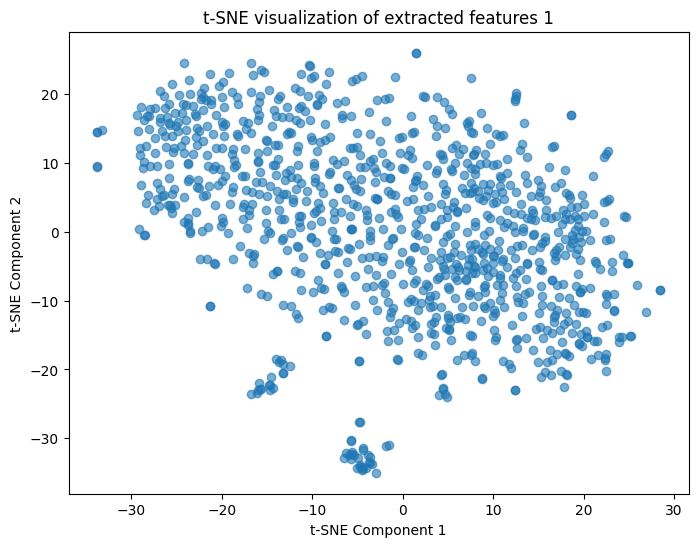

t-SNE results shape: (998, 2)


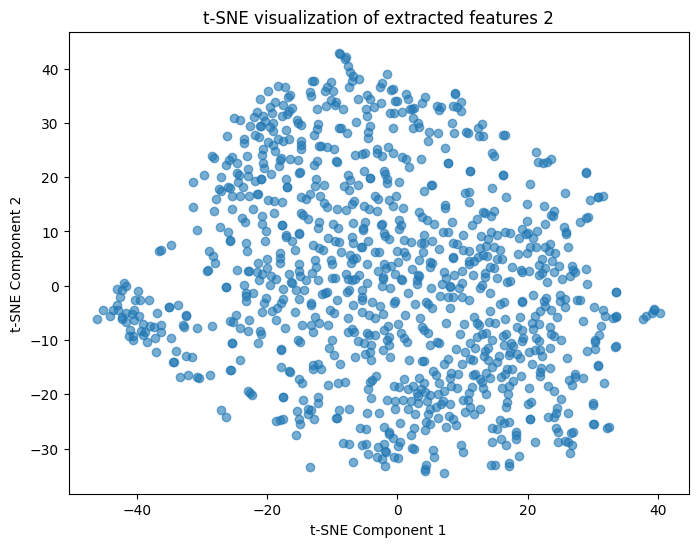

t-SNE results shape: (998, 2)


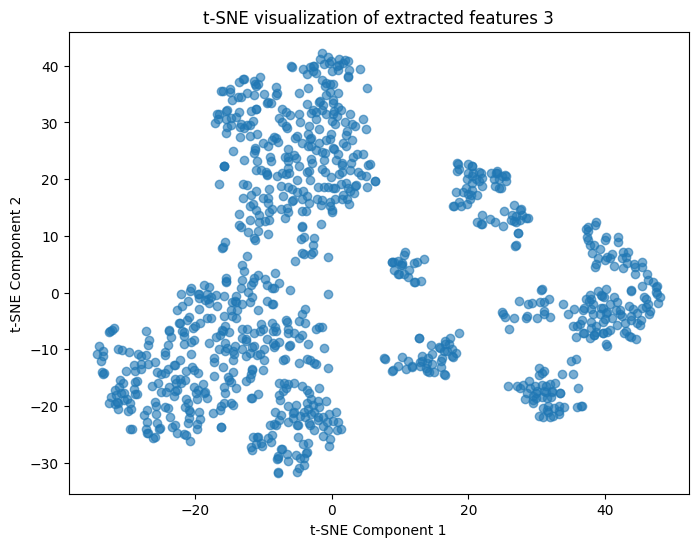

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_function(features, num):
  tsne = TSNE(n_components=2, random_state=42)
  tsne_results = tsne.fit_transform(features)
  print("t-SNE results shape:", tsne_results.shape)

  plt.figure(figsize=(8, 6))
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.6)

  plt.title(f't-SNE visualization of extracted features {num}')
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.show()
  return tsne_results

features_1, features_2, features_3 = extract_features(model_3, images_path_folder, extract_features_bool, output_features_path="features_3.npy")

tsne_results_1 = tsne_function(features_1_pca, 1)
tsne_results_2 = tsne_function(features_2_pca, 2)
tsne_results_3 = tsne_function(features_3_pca, 3)


### Save plots/mosaics

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def tsne_and_visualize(features_pca, images_path_folder, title_prefix, tsne_results, image_size=32, figsize=(12, 12)):
    """
    Perform t-SNE on PCA-reduced features and visualize the results as a mosaic or scatterplot.

    Args:
        features_pca (np.ndarray): PCA-reduced features (e.g., shape: (num_samples, 50)).
        images_path_folder (str): Path to the folder containing images.
        title_prefix (str): Prefix for plot titles (e.g., "Feature Set 1").
        image_size (int): Size to which images will be resized for the mosaic.
        figsize (tuple): Size of the visualization figure.

    Returns:
        np.ndarray: t-SNE results (shape: (num_samples, 2)).
    """
    # Step 2: Normalize t-SNE results for visualization
    x_min, x_max = tsne_results.min(0), tsne_results.max(0)
    tsne_results_norm = (tsne_results - x_min) / (x_max - x_min)

    # Step 3: Gather image paths
    image_paths = []
    for root, dirs, files in os.walk(images_path_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    image_paths.sort()  # Ensure paths match feature order

    # Step 4: Create a scatterplot or mosaic visualization
    fig, ax = plt.subplots(figsize=figsize)
    for i, (x, y) in enumerate(tsne_results_norm):
        if i >= len(image_paths):  # Avoid mismatch in case of extra features
            break
        # Load image and resize
        img = Image.open(image_paths[i]).resize((image_size, image_size))
        img_array = np.array(img).astype('uint8')
        img_box = OffsetImage(img_array / 255.0, zoom=1.0)  # Normalize image for display
        ab = AnnotationBbox(img_box, (x, y), frameon=False)
        ax.add_artist(ab)

    # Configure the plot
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"t-SNE Visualization of {title_prefix}", fontsize=16)
    plt.show()

    # return tsne_results


tsne_and_visualize(features_1_pca, images_path_folder, 'MODEL 3 (block_2_add)', tsne_results_1)
tsne_and_visualize(features_2_pca, images_path_folder, 'MODEL 2 (block_8_add)', tsne_results_2)
tsne_and_visualize(features_3_pca, images_path_folder, 'MODEL 3 (block_16_expand_relu)', tsne_results_3)

Output hidden; open in https://colab.research.google.com to view.